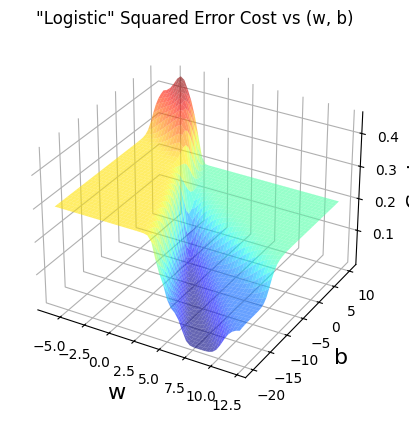

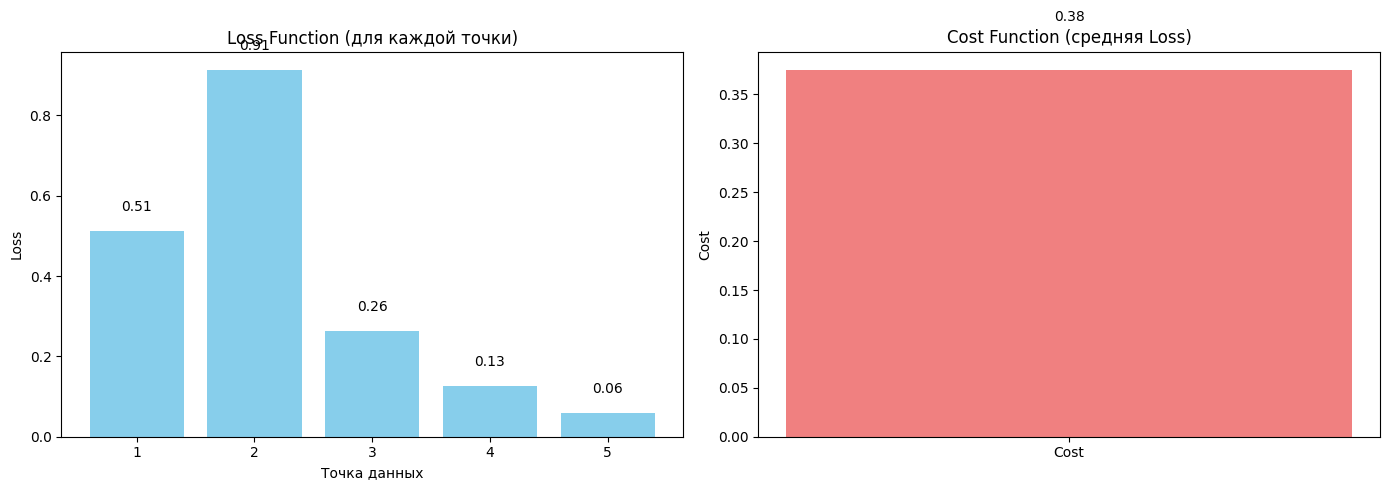

In [5]:
#MY EXAMPLE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def plt_logistic_squared_error(X,y):
    """ plots logistic squared error for demonstration """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(10, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = compute_cost_logistic_sq_err(X.reshape(-1,1), y, w, b)
    cost = cost.reshape(wx.shape)

    fig = plt.figure()
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

def compute_cost_logistic_sq_err(X, y, w, b):
    """
    compute sq error cost on logicist data (for negative example only, not used in practice)
    Args:
      X (ndarray): Shape (m,n) matrix of examples with multiple features
      w (ndarray): Shape (n)   parameters for prediction
      b (scalar):              parameter  for prediction
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)                 #add sigmoid to normal sq error cost for linear regression
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return np.squeeze(cost)

# Функция для логистической сигмоиды
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss-функция для одного наблюдения (binary cross-entropy loss)
def loss(y, y_hat):
    return - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Cost-функция для всего набора данных
def cost_function(X, y, w, b):
    m = len(y)
    total_cost = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        y_hat = sigmoid(z)
        total_cost += loss(y[i], y_hat)
    return total_cost / m

# Данные
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 1, 1, 1])  # Бинарные метки

plt.close('all')
#from plt_logistic_loss import plt_logistic_squared_error
plt_logistic_squared_error(X.reshape(1,-1),y)
plt.show()

# Параметры модели (веса и смещение)
w = np.array([0.8])  # Вес
b = -1.2  # Смещение

# Вычисляем предсказания и ошибки для каждой точки
y_pred = sigmoid(np.dot(X, w) + b)
losses = [loss(y[i], y_pred[i]) for i in range(len(y))]
cost = cost_function(X, y, w, b)

# Визуализация
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 📍 График Loss для каждой точки
axs[0].bar(range(1, len(losses) + 1), losses, color='skyblue')
axs[0].set_title('Loss Function (для каждой точки)')
axs[0].set_xlabel('Точка данных')
axs[0].set_ylabel('Loss')
for i, v in enumerate(losses):
    axs[0].text(i + 1, v + 0.05, f"{v:.2f}", ha='center')

# 📊 График Cost для всей модели
axs[1].bar(['Cost'], [cost], color='lightcoral')
axs[1].set_title('Cost Function (средняя Loss)')
axs[1].set_ylabel('Cost')
axs[1].text(0, cost + 0.05, f"{cost:.2f}", ha='center')

plt.tight_layout()
plt.show()